In [1]:
import numpy as np
% matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

<IPython.core.display.Javascript object>


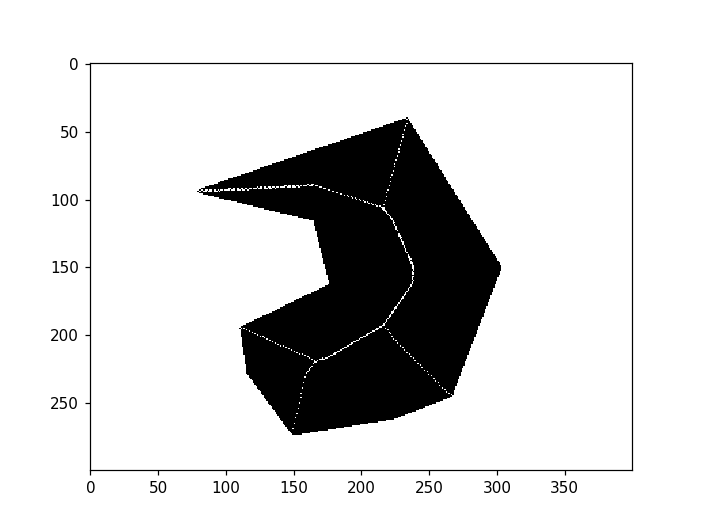

In [2]:
import cv2
import numpy as np
 
img = cv2.imread('./data/MODEL.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

img[img>100]=255
img[img<=100]=0
org=np.copy(img)

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
    
plt.figure()
imshow(skel+(255-org),cmap='gray')